# ARMA Models in StatsModels - Lab 

## Introduction

In this lesson, you'll fit an ARMA model using `statsmodels` to a real-world dataset. 


## Objectives

In this lab you will: 

- Decide the optimal parameters for an ARMA model by plotting ACF and PACF and interpreting them 
- Fit an ARMA model using StatsModels 

## Dataset

Run the cell below to import the dataset containing the historical running times for the men's 400m in the Olympic games.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

data = pd.read_csv('winning_400m.csv')
data['year'] = pd.to_datetime(data['year'].astype(str))
data.set_index('year', inplace=True)
data.index = data.index.to_period("Y")

/Users/Magali/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Preview the dataset
data.head()

,winning_times
year,
1900,49.4
1904,49.2
1908,50.0
1912,48.2
1920,49.6


Plot this time series data. 

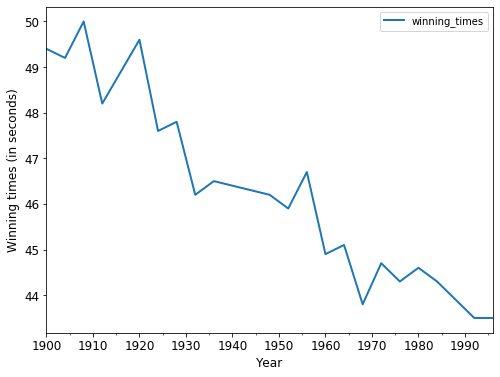

In [3]:
data.plot(figsize=(8,6), linewidth=2, fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Winning times (in seconds)', fontsize=12);

If you plotted the time series correctly, you should notice that it is not stationary. So, difference the data to get a stationary time series. Make sure to remove the missing values.

In [4]:
# Difference the time series
data_diff = data.diff().dropna()
data_diff

,winning_times
year,
1904,-0.2
1908,0.8
1912,-1.8
1920,1.4
1924,-2.0
1928,0.2
1932,-1.6
1936,0.3
1948,-0.3


Use `statsmodels` to plot the ACF and PACF of this differenced time series. 

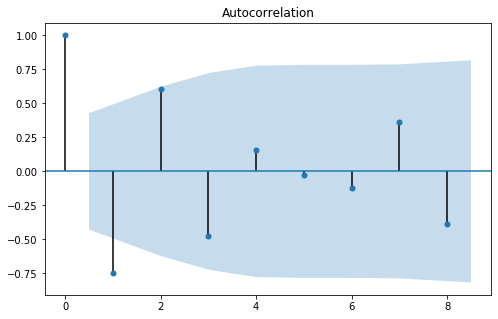

In [5]:
# Plot the ACF
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots(figsize=(8,5))
plot_acf(data_diff, ax=ax, lags=8);

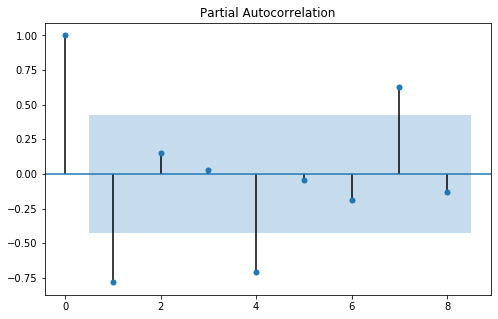

In [6]:
# Plot the PACF
fig, ax = plt.subplots(figsize=(8,5))
plot_pacf(data_diff, ax=ax, lags=8);

Based on the ACF and PACF, fit an ARMA model with the right orders for AR and MA. Feel free to try different models and compare AIC and BIC values, as well as significance values for the parameter estimates. 

In [12]:
# Import ARIMA
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# Fit an ARMA(1,0) model
mod_arma = ARIMA(data_diff, order=(1,0,0))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

                              ARMA Model Results                              
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(1, 0)   Log Likelihood                 -20.054
Method:                       css-mle   S.D. of innovations              0.618
Date:                Tue, 04 Oct 2022   AIC                             46.107
Time:                        15:39:59   BIC                             49.241
Sample:                    12-31-1904   HQIC                            46.787
                         - 12-31-1996                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2885      0.080     -3.602      0.002      -0.445      -0.131
ar.L1.winning_times    -0.7186      0.137     -5.262      0.000      -0.986      -0.451
                

In [15]:
# Fit an ARMA(2,1) model
mod_arma = ARIMA(data_diff, order=(2,0,1))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

                              ARMA Model Results                              
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(2, 1)   Log Likelihood                 -18.955
Method:                       css-mle   S.D. of innovations              0.562
Date:                Tue, 04 Oct 2022   AIC                             47.911
Time:                        15:44:18   BIC                             53.133
Sample:                    12-31-1904   HQIC                            49.044
                         - 12-31-1996                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2916      0.073     -4.018      0.001      -0.434      -0.149
ar.L1.winning_times    -1.6827      0.119    -14.200      0.000      -1.915      -1.450
ar.L2.winning_ti

In [16]:
# Fit an ARMA(2,2) model
mod_arma = ARIMA(data_diff, order=(2,0,2))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

                              ARMA Model Results                              
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(2, 2)   Log Likelihood                 -16.472
Method:                       css-mle   S.D. of innovations              0.461
Date:                Tue, 04 Oct 2022   AIC                             44.943
Time:                        15:44:26   BIC                             51.210
Sample:                    12-31-1904   HQIC                            46.303
                         - 12-31-1996                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2718      0.098     -2.779      0.013      -0.463      -0.080
ar.L1.winning_times    -1.7575      0.097    -18.069      0.000      -1.948      -1.567
ar.L2.winning_ti

## What is your final model? Why did you pick this model?

In [ ]:

"""
ARMA(1,0), ARMA(2,2) and ARMA(2,1) all seem to have decent fits with significant parameters. 
Depending on whether you pick AIC or BIC as a model selection criterion, 
your result may vary. In this situation, you'd generally go for a model with fewer parameters, 
so ARMA(1,0) seems fine. Note that we have a relatively short time series, 
which can lead to a more difficult model selection process.
"""

## Summary 

Well done. In addition to manipulating and visualizing time series data, you now know how to create a stationary time series and fit ARMA models. 